In [1]:
from math import exp, log
import numpy as np

import matplotlib.pyplot as plt

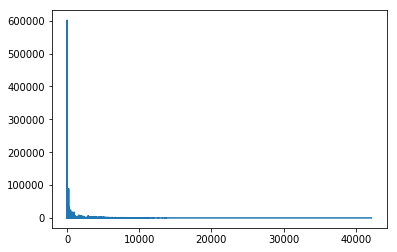

In [2]:
data = [[int (i) for i in line.split()] for line in open('kosarak.dat').readlines()]

d = 42178
n = 990002
freq = np.zeros(d)
for i in range(n):
    freq[data[i]] += 1
plt.plot(freq, linestyle='-')
plt.show()

In [21]:
def GRR(data, d, epsilon):
    p = exp(epsilon)/(exp(epsilon) + d - 1)
    q = 1/(exp(epsilon) + d - 1)
    aggregated_data = np.zeros(d, dtype=int)
    for item in data:
        print(item)
        private_data = item
        if np.random.random_sample() > p - q:
            private_data = np.random.randint(0, d)
        aggregated_data[private_data] += 1
    return (aggregated_data - len(data)*q)/(p - q)

def OUE(data, d, epsilon):
    p = 1 - 1/2
    q = 1/(exp(epsilon)+1)
    aggregated_data = np.zeros(d)
    for item in data:
        private_data = np.zeros(d, dtype=int)
        private_data[item] = 1
        aggregated_data += np.where(private_data == 1, 
            np.random.binomial(1, p, d), 
            np.random.binomial(1, q, d))
    return (aggregated_data - len(data)*q)/(p - q)

def PSFO_Adap(data2d, d, l, epsilon):
    sample = np.zeros(len(data2d), dtype=int)
    for i, data1d in enumerate(data2d):
        pad = data1d[:l] if len(data1d) > l else data1d + (l - len(data1d))*[-1]
        sample[i] = np.random.choice(pad)
    if d < exp(epsilon)*l*(4*l - 1) + 1:
        freq = GRR(sample[sample>0], d, log(l*(exp(epsilon) - 1) + 1))
    else:
        freq = OUE(sample[sample>0], d, epsilon)
    return freq
    
def SVIM(data2d, d, k, epsilon):
    phase1_user = data2d[ : int(0.5*len(data2d))]
    phase2_user = data2d[int(0.5*len(data2d)) : int(0.5*len(data2d))]
    phase1_freq = PSFO_Adap(phase1_user, d, 1, epsilon)
    top_2k = np.argpartition(-phase1_freq, 2*k)[:2*k]
    for i, data in enumerate(phase2_user):
        phase2_user[i] = np.intersect1d(data, top_2k)
    phase2_freq = PSFO_Adap(phase2_user, d, 1, epsilon)
    top_k = np.argpartition(-phase2_freq, k)[:k]
    return top_k
    
epsilon = 1
k = 10
top_k = SVIM(data, d, k, epsilon)
print(top_k)

1


IndexError: index 0 is out of bounds for axis 0 with size 0